电商平台推出的各种数字营销方案，其中付费广告更是颇多花样。广告能给企业增加多少收益？对销量的影响又如何？是否满足企业需求？是否达到预期效果？针对这些问题，本项目就是通过数据分析方法对电商销售收入与广告费的相互关系进行了分析与预测

具体数据如下：

![jupyter](1.png)

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score

# 设置字体为黑体大小为11
plt.rc('font', family='SimHei', size=11)
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")


In [8]:
df1 = pd.read_excel('广告费.xlsx')
df2 = pd.read_excel('销售表.xlsx')

df1['投放日期'] = pd.to_datetime(df1['投放日期'])
df1 = df1.set_index('投放日期', drop=True)

df2['日期'] = pd.to_datetime(df2['日期'])
df2 = df2[['日期', '销售码洋']]
df2 = df2.set_index('日期', drop=True)

# 按月求销售额
df_x = df1.resample('ME').sum().to_period('M')  # 月末，将采样后的时间索引从时间戳（如 2024-09-30）转换为月份期间对象（如 2024-09）。
df_y = df2.resample('ME').sum().to_period('M')  # 这表示 整个9月的数据，而不是某个具体的日期。

# y1 广告费, y2销售额
y1 = pd.DataFrame(df_x['支出'])
y2 = pd.DataFrame(df_y['销售码洋'])

# 天和月导出为excle
df_d = df2.resample('D').sum().to_period('D')
df_m = df2.resample('ME').sum().to_period('M')

df_d.to_excel('df按天销售额.xlsx', engine='openpyxl')
df_m.to_excel('df按月销售额.xlsx', engine='openpyxl')

if os.path.exists('df按天销售额.xlsx'):
    print('表 "df按天销售额.xlsx" 创建成功')
else:
    print('表 "df按天销售额.xlsx" 创建失败')

if os.path.exists('df按月销售额.xlsx'):
    print('表 "df按月销售额.xlsx" 创建成功')
else:
    print('表 "df按月销售额.xlsx" 创建失败')


表 "df按天销售额.xlsx" 创建成功
表 "df按月销售额.xlsx" 创建成功


**1.销售与收入数据分析**  

按天和按月分析销售收入数据，绘制折线图和柱形图  

**因为数据量过大，需要将数据拆分后进行绘制，不然CPU会过载**

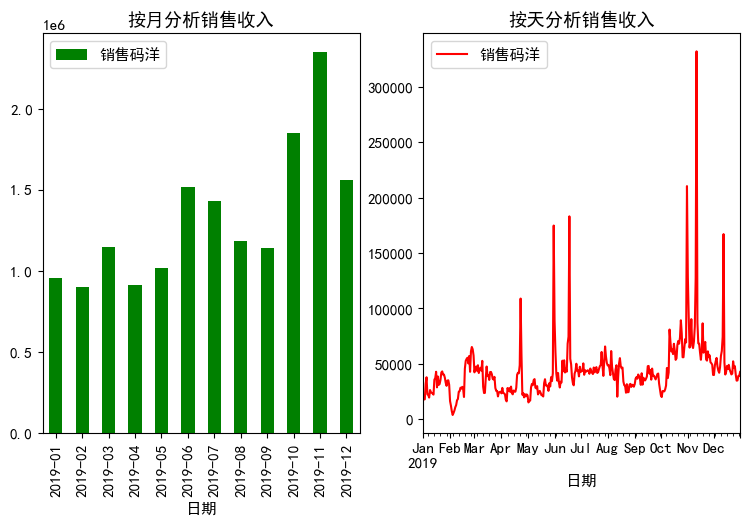

In [9]:
fig = plt.figure(figsize=(9, 5))
ax = fig.subplots(1, 2)

ax[0].set_title('按月分析销售收入')
ax[1].set_title('按天分析销售收入')

# 柱状
df_m.plot(kind='bar', ax=ax[0], color='g')
# 折线(plot默认)
df_d.plot(ax=ax[1], color='r')

# 调整图表距上部和底部的空白
plt.subplots_adjust(top=0.95, bottom=0.15)
plt.show()

**2.销售收入与广告费的相关性分析。**  
通过绘制双y轴折线图和散点图，更清晰直观地对比两组数据的变化和趋势。  


根据输出结果可以发现，两组数据的变化和趋势大致相同，整体都呈现增长趋势。数据分析是数据预测的基础，为科学的决策提供了依据。  


**【关键技术】**  
绘制折线图plot、散点图scatter、绘制子图add_subplot、x轴刻度标签xticks、**添加共享x轴的第二个y轴twinx**。

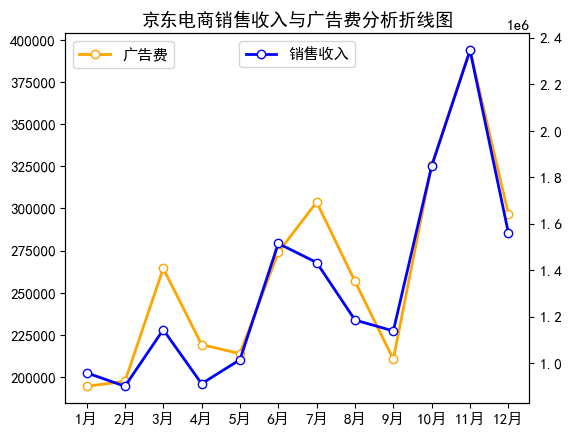

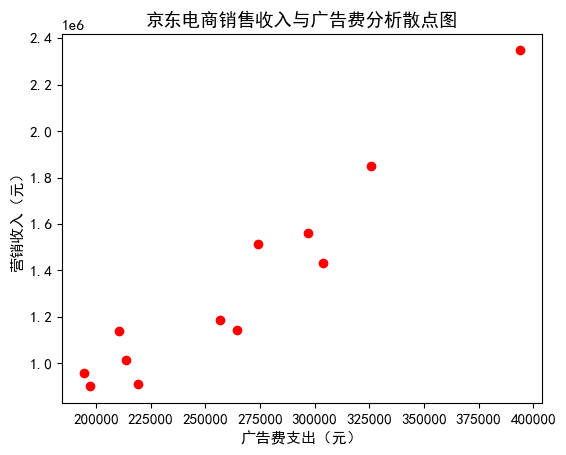

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)  # 222 也就是在2*2的画布上在第二个位置画图
plt.title('京东电商销售收入与广告费分析折线图')
x = [x for x in range(12)]
y = [f'{x}月' for x in range(1, 13, 1)]
plt.xticks(x, y)

# .values可以将其数据转化为数组，用来画图
ax1.plot(x, y1.values, color='orange', linewidth=2,  # x是月份，y是广告费支出
         linestyle='-', marker='o', mfc='w', label='广告费')
plt.legend(loc='upper left')  # 图例放在左上角

# 共享x轴添加y轴坐标轴
ax2 = ax1.twinx()
ax2.plot(x, y2.values, color='b', linewidth=2, linestyle='-',
        marker='o', mfc='w', label='销售收入')  # mfc表示每个折点小圈内部的颜色, w是白色

# 调整图标位置
plt.subplots_adjust(right=0.85) # 留出右侧15%的位置放图例和注释
plt.legend(loc='upper center')  # 图例放中间
plt.show()

# 散点图
plt.title('京东电商销售收入与广告费分析散点图')
plt.scatter(y1, y2, color='r')
plt.xlabel('广告费支出（元）')
plt.ylabel('营销收入（元）')
plt.subplots_adjust(left=0.15)
plt.show()


**3.销售收入数据预测。**  


基于上述数据分析结果，采用线性回归方法，对未来6个月的销售收入进行预测。将散点图与折线图结合起来，绘制线性拟合图，直观展示真实数据与预测数据的关系，散点图体现真实数据，折线图为预测数据。  


**【关键技术】**  
线性回归模型LinearRegression、训练模型fit、测试模型predict、模型评估r2_score。  

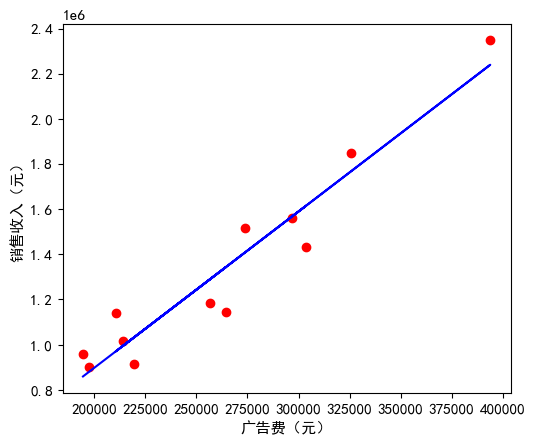

预测值与真实值之间的拟合度0.9839200886906196



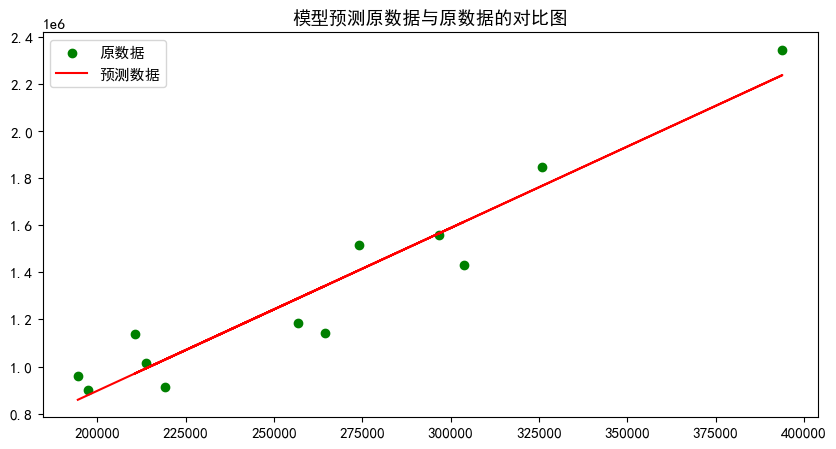

预测训练集的值与真实值之间的拟合度0.9839200886906196



In [13]:
clf = linear_model.LinearRegression()
clf.fit(y1, y2)

# 未来 6 个月计划投入的广告费
x0 = np.array([120000, 130000, 150000, 180000, 200000, 250000])
x0 = x0.reshape(6, 1)  # 重塑为 6 行 1 列的数组

y0 = clf.predict(x0)

# 用模型去预测 y1 中原有的数据因为有真实值去支撑
# y1 是支出广告费用，且是按月聚合
y_pred = clf.predict(y1)

plt.figure('京东电商销售数据分析与预测')
# 真实值
plt.scatter(y1.values, y2.values, color='r')
# 预测曲线
plt.plot(y1.values, y_pred, color='b', linewidth=1.5)
plt.xlabel('广告费（元）')
plt.ylabel('销售收入（元）')
plt.subplots_adjust(left=0.2)
plt.show()

# 预测评分
# 真实值
y_true = [360000, 450000, 600000, 800000, 920000, 1300000]
score = r2_score(y_true, y0)
print(f'预测值与真实值之间的拟合度{score}\n')

# 用模型去预测训练集的值
# 结果还不错
y_src = y2.values
plt.figure(figsize=(10, 5))
plt.scatter(y1.values, y2.values, color='g', label='原数据')
plt.plot(y1.values, y_pred, color='r', label='预测数据')
plt.title('模型预测原数据与原数据的对比图')
plt.legend()
plt.show()

score_src = r2_score(y_pred, y_src)
print(f'预测训练集的值与真实值之间的拟合度{score}\n')

In [12]:
第一个 1：表示子图的行数，即图中有 1 行。
第二个 1：表示子图的列数，即图中有 1 列。
第三个 1：表示索引，即当前是第 1 个子图。

# 添加第一个子图（1,1 位置）
ax1 = fig.add_subplot(221)  
ax1.set_title("Plot 1")

# 添加第二个子图（1,2 位置）
ax2 = fig.add_subplot(222)  
ax2.set_title("Plot 2")

# 添加第三个子图（2,1 位置）
ax3 = fig.add_subplot(223)  
ax3.set_title("Plot 3")

# 添加第四个子图（2,2 位置）
ax4 = fig.add_subplot(224)  
ax4.set_title("Plot 4")


SyntaxError: invalid character '：' (U+FF1A) (4280424004.py, line 1)